In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections

colors =['r','b','g','c','m']

### Question 1

### 1- Pretraitement des données

In [2]:
def data_as_dataframe(link):
    Class=[]
    X=[]
    Y=[]
    with open(link, 'r') as lien:
        lignes = lien.readlines()
    for l in lignes:
        l = l.split(" ")
        Class.append(l[0])
        X.append(l[1])
        Y.append(l[2].replace("\n",""))
    datafram = pd.DataFrame({"Class":Class,"X":X,"Y":Y})
    return datafram

In [3]:
data_train= data_as_dataframe('data_tp1_app.txt')
data_test= data_as_dataframe('data_tp1_dec.txt')
data_train2= data_as_dataframe('data_tp2_app.txt')
data_test2= data_as_dataframe('data_tp2_dec.txt')
data_train3= data_as_dataframe('data_tp3_app.txt')
data_test3=  data_as_dataframe('data_tp3_dec.txt')

Pour chaque fichier de donnée , on va extraire les 5 differentes classes

In [4]:
def return_class(datafram):
    datafram.Class = datafram.Class.astype("int")
    datafram.X = datafram.X.astype("float")
    datafram.Y = datafram.Y.astype("float")
    c1 = datafram[datafram.Class==1].iloc[:,0:3]
    c2 = datafram[datafram.Class==2].iloc[:,0:3]
    c3 = datafram[datafram.Class==3].iloc[:,0:3]
    c4 = datafram[datafram.Class==4].iloc[:,0:3]
    c5 = datafram[datafram.Class==5].iloc[:,0:3]
    return c1, c2, c3, c4, c5, datafram

- Avant d'entamer la fct my_perceptron , il faut d'abord différencer les deux classes .

- L'idée est de créer une fonction séparateur , qui va séparer les classes en ajoutant une nouvelle cordonner Z {-1,+1}

In [5]:
def separateur(c1, c2):
    w1 = c1.iloc[:,1:3]
    w1["Z"] = 1
    w2 = c2.iloc[:,1:3]
    w2 = c2.iloc[:,1:3]*-1
    w2["Z"] = -1
    return w1, w2

### 2- PERCEPTRON

On va essayer de créer la fonction my_perceptron en suivant l'algorithme suivant

1- On commence par un vecteur quelconque , dans notre cas , c'est le vecteur init qu'on initialise avec [0,0,0]

- ce meme vecteur va contenir à la fin le vecteur qui sépare les deux classes

2-On prend un point Yn de la concatenation des deux classes 

3-Si  Yn*init <= 0 alors on change le vecteur init

- init = init[-1] * Yn

- Il faut reparcourir dès le début avec le nouveau vecteur init

4- si pour tous les points Yn ,  Yn*init >0 alors le vecteur de la séparation est init

In [6]:
def my_perceptron(C1, C2):
    init=np.array([0, 0, 0],dtype=float)
    Concat = np.array(pd.concat([C1, C2]))
    verif = 'separateur est changé'
    while(verif== 'separateur est changé'):
        verif = 'separateur non changer'
        for i in range(len(Concat)):
            if(np.dot(Concat[i,0:3],init.reshape(-1,1))[0]<=0):
                verif = 'separateur est changé'
                init = np.add(Concat[i,0:3],init)
    return  init,verif

#### 3-ONEVSONE

In [7]:
def OnevsOne(c1,c2):    
    X=pd.concat([c1, c2])
    C1, C2 = separateur(c1, c2)
    vecteur,etat = my_perceptron(C1,C2)
    ###Creation du vecteur 
    Xlab = []
    Ylab = []
    for i in range(-10, 10, 1):
        C = (-vecteur[0] /vecteur[1]) * i - vecteur[2] / vecteur[1]
        Xlab.append(i)
        Ylab.append(C)
    ###Affichage des deux classes séparés
    plt.figure(figsize=(10,5))
    plt.plot((X.iloc[0:99, 1:3]).iloc[:,0], (X.iloc[0:99, 1:3]).iloc[:, 1], 'o')
    plt.plot((X.iloc[100:199, 1:3]).iloc[:, 0], (X.iloc[100:199, 1:3]).iloc[:, 1],'o') 
    plt.plot(Xlab, Ylab)


### 4-Test sur le jeu de données TP1

In [8]:
c1, c2, c3, c4, c5, datafram=return_class(data_train)

In [9]:
CLASSES = [c1, c2, c3, c4, c5]

On va génerer les 5*4/2 hyperplans

In [10]:
def mytest(classes):
    L=len(classes)
    for i in range(L):
        for j in range(i+1,L):
            print('Class '+str(i) +' Vs Class '+str(j))
            OnevsOne(classes[i],classes[j])
    return 0

            
    


Class 0 Vs Class 1
Class 0 Vs Class 2
Class 0 Vs Class 3
Class 0 Vs Class 4
Class 1 Vs Class 2
Class 1 Vs Class 3
Class 1 Vs Class 4
Class 2 Vs Class 3
Class 2 Vs Class 4
Class 3 Vs Class 4


0

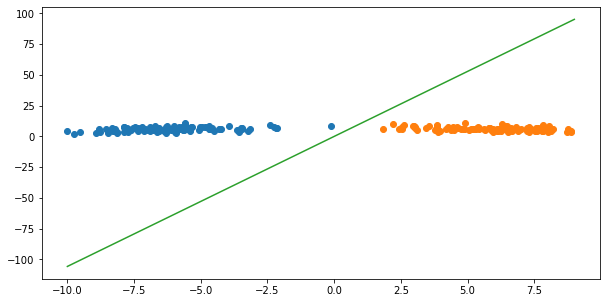

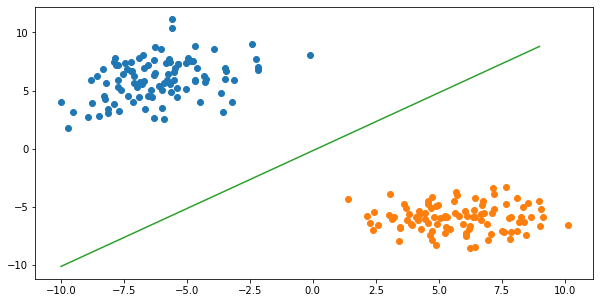

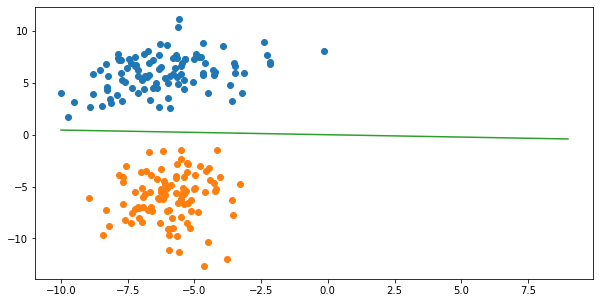

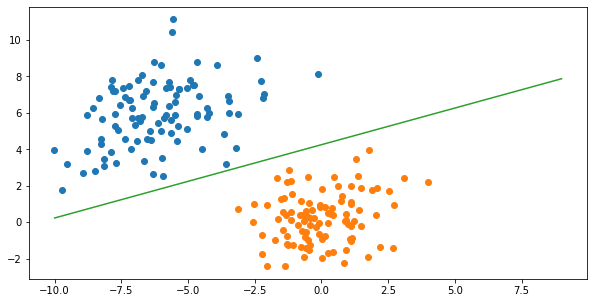

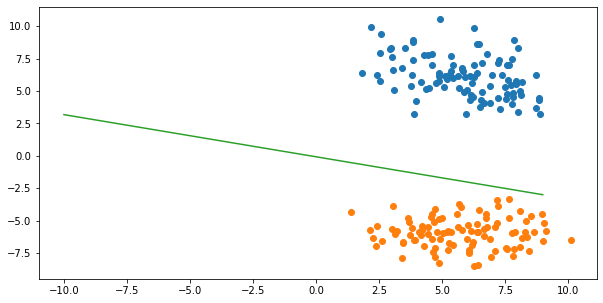

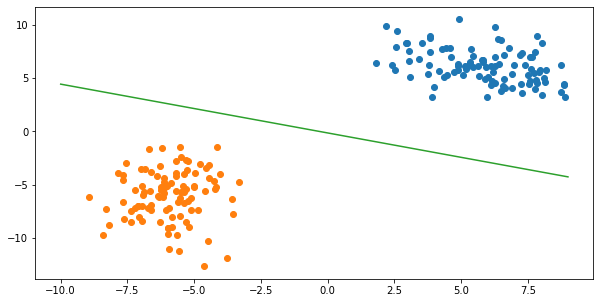

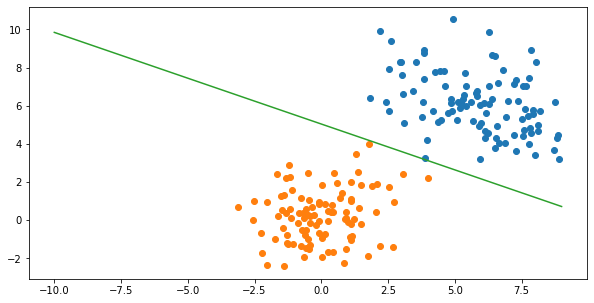

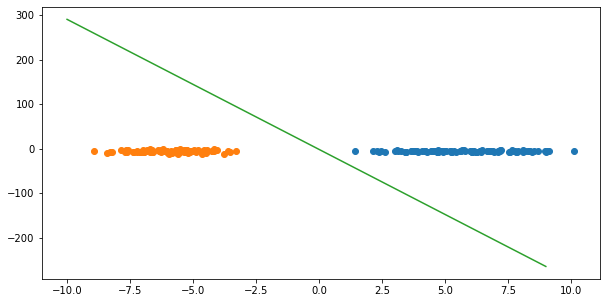

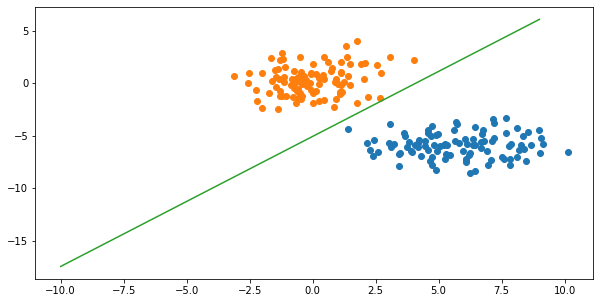

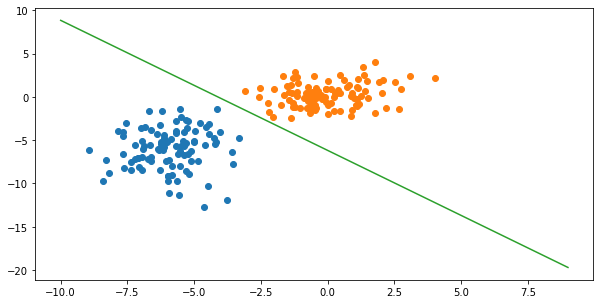

In [11]:
mytest(CLASSES)

### Question 2

- On sait que l'algorithme de perceptron marche que pour les données linéairement séparable

- L'objectif de cette deuxieme partie est d'adapter cette algorithme pour qu'il converge vers une solution pour les jeu de données TP2 et TP3

### Perceptron Adapté

In [12]:
def my_perceptron_adapte(C1, C2):
    init=np.array([0, 0, 0],dtype=float)
    Concat = np.array(pd.concat([C1, C2]))
    verif = 'separateur est changé'
    while(verif== 'separateur est changé' ):
        verif = 'separateur non changer'
        for i in range(len(Concat)):
            if(np.dot(Concat[i,0:3],init.reshape(-1,1))[0]<=0):
                verif = 'separateur est changé'
                init = np.add(Concat[i,0:3],init)
    return  init

In [13]:
def Onevsone_adapte(c1_train,c2_train,c1_test,c2_test):
    p_app1 = my_perceptron_adapte(c1_train, c2_train)
    X=pd.concat([c1_test, c2_test])
    C1, C2 = separateur(c1, c2)
    vecteur = my_perceptron_adapte(C1,C2)
    ###Creation du vecteur 
    Xlab = []
    Ylab = []
    for i in range(-25, 25, 1):
        C = (-vecteur[0] /vecteur[1]) * i - vecteur[2] / vecteur[1]
        if abs(C) > 25:
            continue 
        Xlab.append(i)
        Ylab.append(C)
    ###Affichage des deux classes séparés
    plt.figure(figsize=(10,5))
    plt.plot((X.iloc[0:99, 1:3]).iloc[:,0], (X.iloc[0:99, 1:3]).iloc[:, 1], 'o')
    plt.plot((X.iloc[100:199, 1:3]).iloc[:, 0], (X.iloc[100:199, 1:3]).iloc[:, 1],'o') 
    plt.plot(Xlab, Ylab)

### On teste sur les données TP2

In [14]:
c1, c2, c3, c4, c5, datafram=return_class(data_train2)

In [15]:
c1_t, c2_t, c3_t, c4_t, c5_t, datafram=return_class(data_test2)

In [16]:
Classes2= [[c1,c1_t],[c2,c2_t],[c3,c3_t],[c4,c4_t],[c5,c5_t]]

In [17]:
def mytest_2(classes):
    L=len(classes)
    for i in range(L):
        for j in range(i+1,L):
            print('Class '+str(i) +' Vs Class '+str(j))
            Onevsone_adapte(classes[i][0], classes[j][0], classes[i][1], classes[j][1])
    return 0

Class 0 Vs Class 1
Class 0 Vs Class 2
Class 0 Vs Class 3
Class 0 Vs Class 4
Class 1 Vs Class 2
Class 1 Vs Class 3
Class 1 Vs Class 4
Class 2 Vs Class 3
Class 2 Vs Class 4
Class 3 Vs Class 4


0

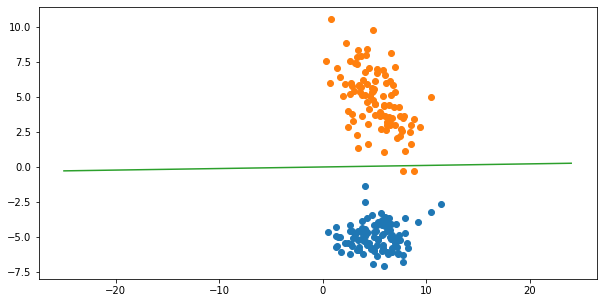

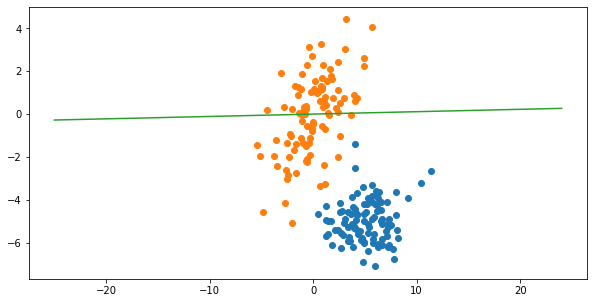

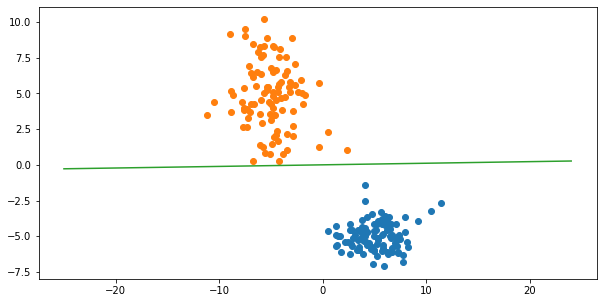

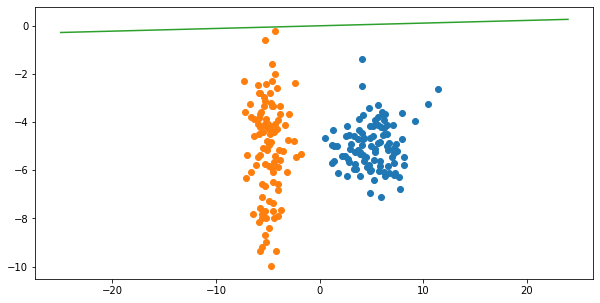

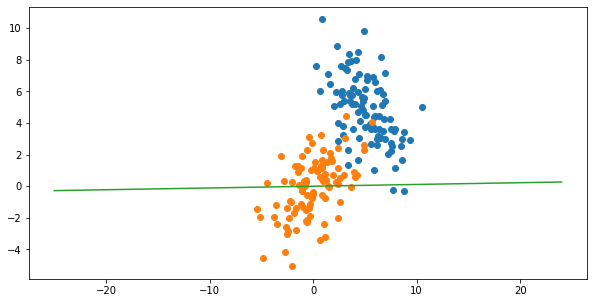

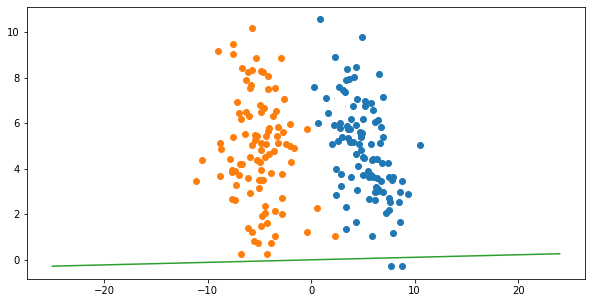

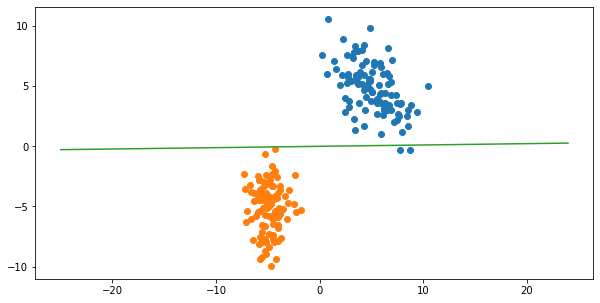

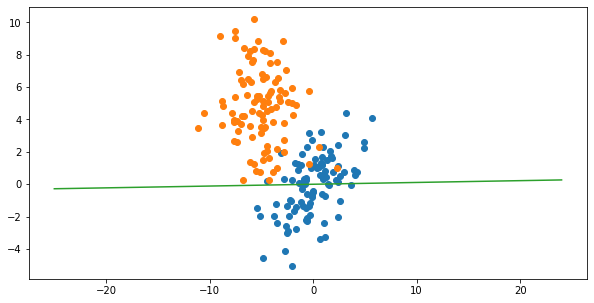

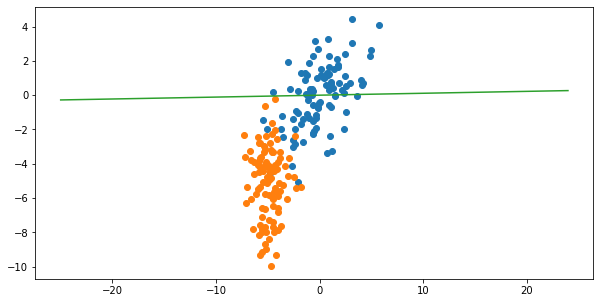

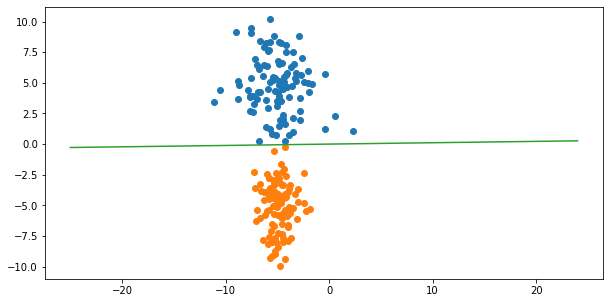

In [18]:
mytest_2(Classes2)

### Question 3

In [38]:
def split_data_for_OvsA(df,Classe_i):
    W1 = df[df.Class==Classe_i].iloc[:,0:3] 
    W2 = df[df.Class!=Classe_i].iloc[:,0:3]
    W2 = W2[W2.Class!=5].iloc[:,0:3]
    return W1,W2

In [39]:
def equation(an,xn):
    # on utilise les données d'apprentissages pour
    # construire l'équation de la droite
    # avec, les coef ai trouvé à l'aide du perceptron
    a1 = an[0]
    a2 = an[1]
    a3 = an[2]
    x1 = xn[1]
    x2 = xn[2]
    # l'équation de la droite pour un W1 vs W2 est alors :
    #print(a1)
    eq = a1 * x1 + a2 * x2 + a3
    return eq

In [40]:
def Confusion_Matrix(w1,w,w1_test,w2_test, txt):
    plt.figure()
    plt.ylim((-50,50))
    accuracy = []
    w = [w1,w2,w3,w4]
    for i in range(3):
        accuracy.append(screen_OvsO_adapte2(w1, w[i], w1_test, w2_test, txt, c1, c2, plt.gca()))
    return accuracy

In [41]:
def perceptron_OvA(df, Classe_i, A):
    assert len(A)==df.shape[1]
    W1, W2 = split_data_for_OvsA(df,Classe_i)
    W1T, W2T = separateur(W1, W2)  
    W = np.array(pd.concat([W2T,W1T]))
    Vecteur_A = [A]
    #juste pour savoir combien d'itération ont été faites !
    iteration = 0 
    check = True
    sizeW1 = len(W1)
    sizeW2 = len(W2)
    taux = 100
    check_error = True
    while(check and check_error):
        check = False
        iteration += 1
        check_error = False
        #print("*************************")
        #print("iteration="+str(iteration))
        for i in range(len(W)):
            if(np.dot(W[i,0:3],A.reshape(-1,1))[0]<=0):
                check = True
                A = np.add(W[i,0:3],A)
                #print(A)
        Vecteur_A.append(A)
        n = len(Vecteur_A)
        new_taux =  classification_accuracy2(np.array(W1),Vecteur_A[len(Vecteur_A)-1],np.array(W2),sizeW1,sizeW2)
        if new_taux != taux:
            check_error = True
        taux = new_taux    
    return Vecteur_A, n, iteration    

In [42]:
def point_coeff_dir2(Classe_i, A, precision):
    pointX = []
    pointY = []
    for i in range(precision[2], precision[1], precision[0]):
        Coefficient_directeur = ((-A[0])* i - A[2]) / A[1]
        if(Classe_i==3):
            pointX.append(i/100)
            pointY.append(Coefficient_directeur/100)            
        else :
            pointX.append(i)
            pointY.append(Coefficient_directeur)
    return pointX,pointY

In [43]:
def uneSeparation_OvsAll(Classe_i, A, X1, X2, precision, txt, a, b):
    plt.figure(figsize=(15,10))
    pointX, pointY = point_coeff_dir2(Classe_i, A, precision)
    plt.scatter((X1.iloc[:, 1:3]).iloc[:,0], (X1.iloc[:, 1:3]).iloc[:, 1], label= 'classe '+str(a)+'')
    plt.scatter((X2.iloc[:, 1:3]).iloc[:, 0], (X2.iloc[:, 1:3]).iloc[:, 1], label= 'classes '+str(b)+'')
    plt.title(txt)
    plt.legend()
    plt.plot(pointX, pointY)

In [44]:
def screenOvsAll(Classe_i, df,txt, a, b):    
    A = np.array([0,0,0])
    X1, X2 = split_data_for_OvsA(df,Classe_i)
    p_app, n, iteration = perceptron_OvA(df, Classe_i, A)
    uneSeparation_OvsAll(Classe_i,p_app[len(p_app)-1], X1, X2, [1, 15, -15],txt, a, b)

In [45]:
def classification_accuracy2(W1,last_a,W2,size1,size2):
    tx = 0
    size_of_data = size1+size2
    for point1 in W1:
        metrique1=equation(last_a,point1)
        if metrique1>0:
            tx = tx + 1
    for point2 in W2:
        metrique2=equation(last_a,point2)
        if metrique2<0:
            tx = tx + 1
    return (tx * 100)/ size_of_data

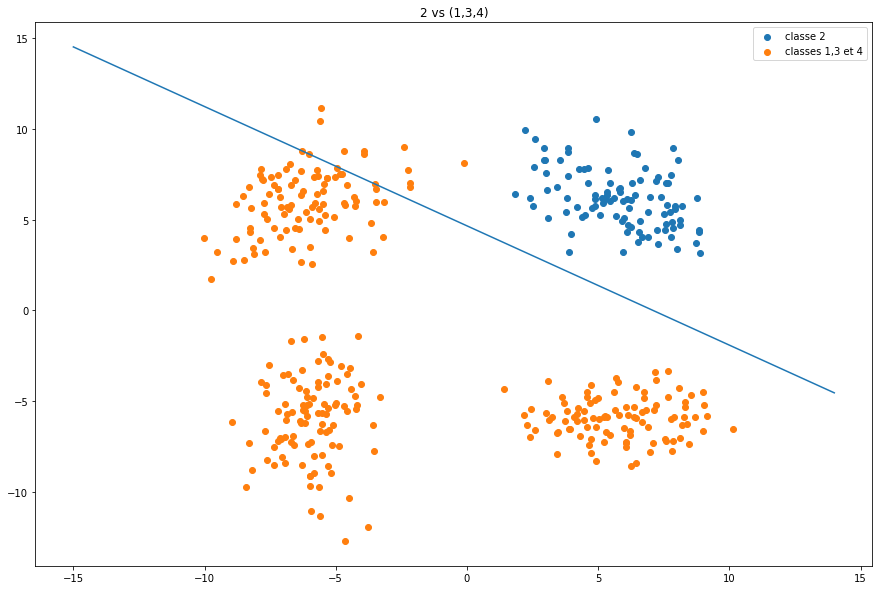

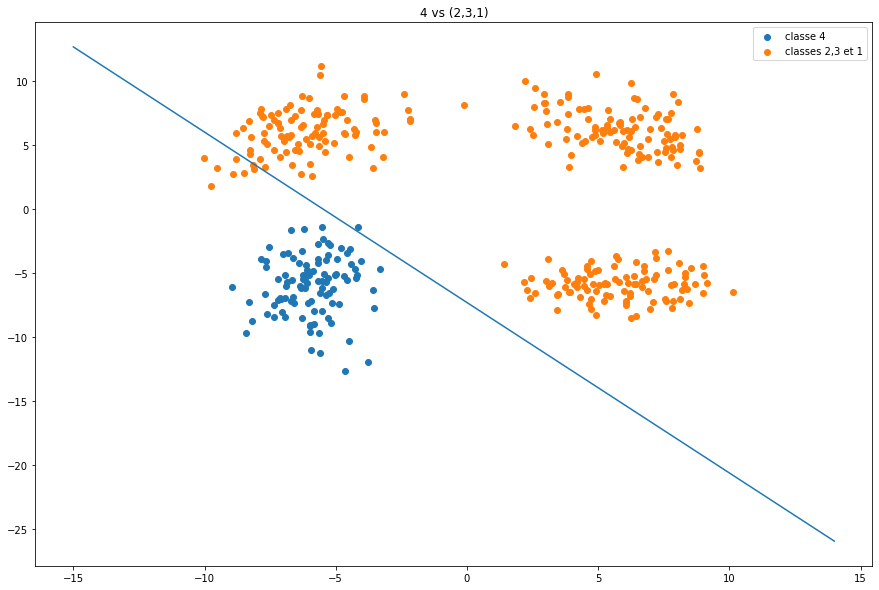

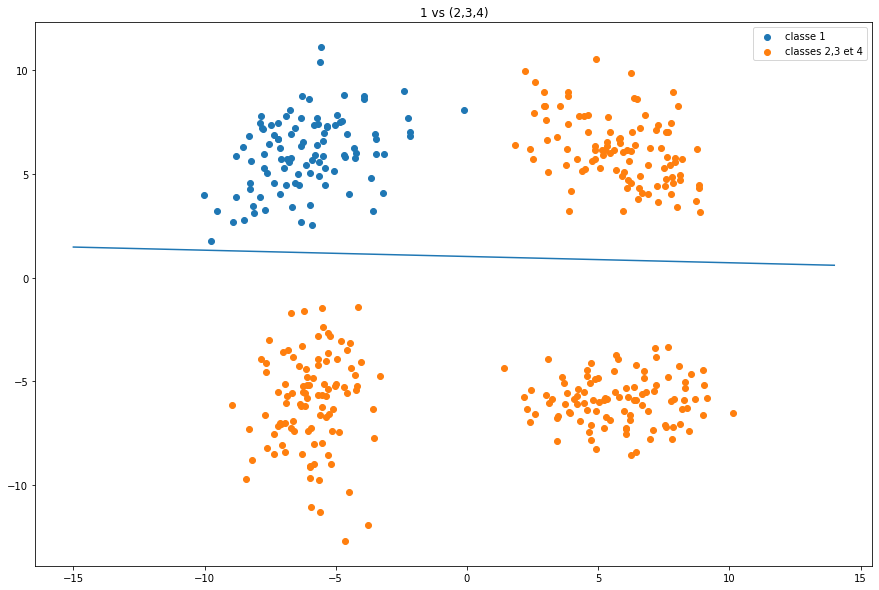

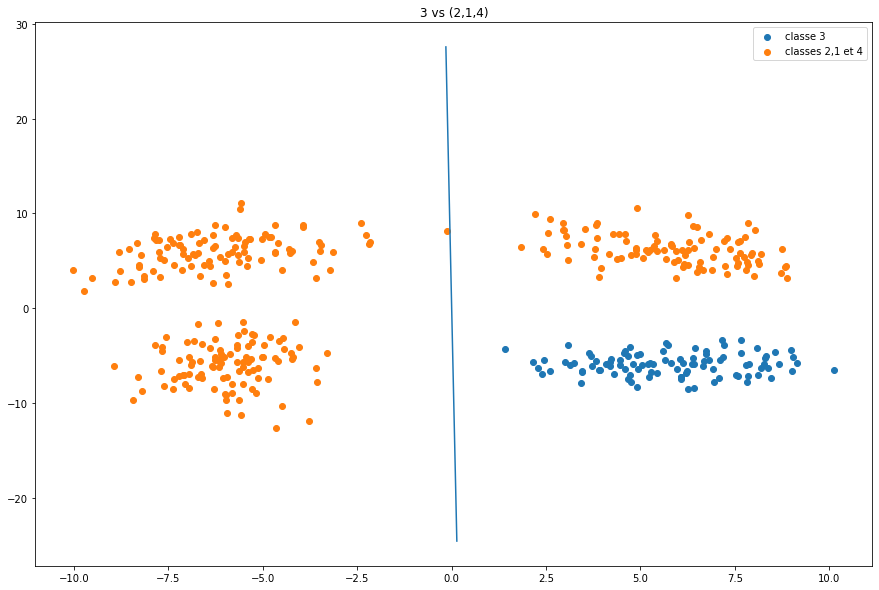

In [46]:
screenOvsAll(2, data_train, "2 vs (1,3,4)", "2", "1,3 et 4")
screenOvsAll(4, data_train, "4 vs (2,3,1)", "4", "2,3 et 1")
screenOvsAll(1, data_train, "1 vs (2,3,4)", "1", "2,3 et 4")
screenOvsAll(3, data_train, "3 vs (2,1,4)", "3", "2,1 et 4")

### Evaluation

In [47]:
def classification_accuracy3(W1,last_a,W2,size1,size2):
    tx = 0
    size_of_data = size1+size2
    for point1 in W1:
        metrique1=equation(last_a,point1)
        if metrique1<0:
            tx = tx + 1
    for point2 in W2:
        metrique2=equation(last_a,point2)
        if metrique2<0:
            tx = tx + 1
    return (tx * 100)/ size_of_data

In [48]:
def perceptron(W1, W2, A):
    assert len(A)==W1.shape[1]
    W = np.array(pd.concat([W1, W2]))
    Vecteur_A = [A]
    iteration = 0 
    check = True
    while(check):
        check = False
        iteration += 1
        for i in range(len(W)):
            if(np.dot(W[i,0:3],A.reshape(-1,1))[0]<=0):
                check = True
                A = np.add(W[i,0:3],A)
        Vecteur_A.append(A)
        n = len(Vecteur_A)
    return Vecteur_A, n, iteration

In [49]:
def Confusion_Matrix(df_app, df_dec):
    accuracy = []
    A = np.array([0,0,0])
    Vecteur_A = []
    W = [df_app.iloc[0:100,:],
        df_app.iloc[100:200,:],
        df_app.iloc[200:300,:],
        df_app.iloc[300:400,:],
        df_app.iloc[400:500,:]]
    W_dec = [df_dec.iloc[0:100,:],
        df_dec.iloc[100:200,:],
        df_dec.iloc[200:300,:],
        df_dec.iloc[300:400,:],
        df_dec.iloc[400:500,:]]
    precision=[1, 25, -25] 
    check_init = 1
    check = 1 # On check j
    p_app = []
    start = 0
    scores = []
    for i in range(start, 5):
        if (i==4):
            break;
        for j in range(start,5):
            if check > i and i!=j and check!=i :
                p_app, n, iteration = perceptron(W[j], W[i], A)
                scores.append(classification_accuracy3(np.array(W_dec[i]), p_app[len(p_app)-1],np.array(W_dec[j]),len(W_dec[i]),len(W_dec[j])))   
                Vecteur_A.append(p_app[len(p_app)-1])
                check += 1
        check_init +=1
        check = check_init 
        start = check - 1
    scores2 = []
    for i in range(5):
        if i!= 2 :
            p_app2, n, iteration = perceptron(W[i], W[i], A)            
        else :
            p_app, n, iteration = perceptron(W[i], W[i], A)
        scores2.append(classification_accuracy3(np.array(W_dec[i]), p_app[len(p_app)-1],np.array(W_dec[i]),len(W_dec[i]),len(W_dec[i]))) 
    matrice = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
                if i!=j :
                    matrice[i,j]=int(scores[i])
                elif i==j :
                    matrice[i,j]=int(scores2[i])
    return matrice

### Jeu de données TP1

In [50]:
w1, w2, w3, w4, w5, df_app1 = return_class(data_train)
w1, w2, w3, w4, w5, df_dec1 = return_class(data_test)
score1 = Confusion_Matrix(df_app1,df_dec1)
print(score1)

[[100.  43.  43.  43.  43.]
 [ 50.   0.  50.  50.  50.]
 [ 54.  54. 100.  54.  54.]
 [ 74.  74.  74. 100.  74.]
 [ 50.  50.  50.  50.  75.]]


###  Jeu de données TP2

In [51]:
w1, w2, w3, w4, w5, df_app1 = return_class(data_train2)
w1, w2, w3, w4, w5, df_dec1 = return_class(data_test2)
score1 = Confusion_Matrix(df_app1,df_dec1)
print(score1)

[[  0.  48.  48.  48.  48.]
 [ 28.  57.  28.  28.  28.]
 [ 52.  52.  57.  52.  52.]
 [ 79.  79.  79.  98.  79.]
 [ 29.  29.  29.  29. 100.]]


###  Jeu de données TP3

In [52]:
w1, w2, w3, w4, w5, df_app1 = return_class(data_train3)
w1, w2, w3, w4, w5, df_dec1 = return_class(data_test3)
score1 = Confusion_Matrix(df_app1,df_dec1)
print(score1)

[[59. 28. 28. 28. 28.]
 [72. 47. 72. 72. 72.]
 [70. 70. 89. 70. 70.]
 [24. 24. 24. 31. 24.]
 [53. 53. 53. 53.  0.]]


### Conclusion

On conclut que la classification en utilisant One vs One est meilleur que la classification One vs All car on sépare chaque classe avec une autre classe , Donc on aura plusieurs  donnée qui seront bien classés , alors que pour one vs all , on aura beaucoup de donnée qui seront dans des régions indeterminé